In [62]:
import re
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import corpus
import nltk
from nltk.corpus import stopwords

def tokenword(df,date='2022-06-01',a='bad'):
    
    #df=df[df['at']>date]

    len(df)#df['content'].iloc[:10000].astype(str).sum(axis=0)#.apply(lambda x: type(x)==int)

    df_new=pd.DataFrame()
    
    if a=='bad':
        df_3=df[df["score"]<4]
    else:
        df_3=df[df["score"]>=4]
    for j in df_3['Bank'].unique():
        corpus=' '
        df_3_b=df_3[df_3["Bank"]==j]
    #     for i in range(df_3_b.shape[0]):
    #         corpus=corpus+df_3_b['content'].iloc[i]
        corpus=df_3_b['content'].astype(str).sum(axis=0)
        corpus = nltk.sent_tokenize(corpus)
        for i in range(len(corpus)):
            corpus [i] = corpus[i].lower()
            corpus [i] = re.sub(r'\W',' ',corpus [i])
            corpus [i] = re.sub(r'\s+',' ',corpus [i])
        wordfreq = {}
        for sentence in corpus:
            tokens = nltk.word_tokenize(sentence)
            for token in tokens:
                if token not in wordfreq.keys():
                    wordfreq[token] = 1
                else:
                    wordfreq[token] += 1
            #df["tokenize"]=#df['content'].str.lower().apply(lambda x: nltk.tokenize.word_tokenize(x))


            text=wordfreq

            avg=df_3_b['score'].value_counts()
        df_new=df_new.append(pd.DataFrame([j,text,avg]).T)


    #df_new[1]

    df_new.columns=['Bank','Tokens','value_counts_rating']

    from nltk import FreqDist

    #df_new['Freq']=df_new['Tokens'].apply(FreqDist)

    df_new=df_new.reset_index(drop=True)

    df_new

    #df_temp['Tokens']

    df_new_temp=pd.DataFrame()
    for j,i in enumerate(df_new['Bank'].unique()):
        df_temp=df_new[df_new['Bank']==i]
        l=pd.DataFrame(df_temp['Tokens'][j].values(),df_temp['Tokens'][j].keys()).reset_index()
        l.columns=['Word','Freq']
        l['Bank']=i
        l=l.sort_values('Freq',ascending=False)
        print(l)
        df_new_temp=df_new_temp.append(l)

    #df_new_temp.to_csv('Bad_reviews_Word_count.csv')#.sort_values(['Bank','Freq'])

    df_new_temp=df_new_temp.reset_index()

    #not working 
    #working
    #working

    #from nltk import stopwords

    stp=[i for i in stopwords.words('english') if i not in ['not']]

    #stp

    df_v=df_new_temp[~df_new_temp['Word'].isin(stp)]

    df_v.tail(3)['Word']
    df_v.iloc[7798]

    #df_v
    df_v.iloc[7797]['Word']
    #df_v.iloc[4166]

    df_v['Word'].str.replace('\s','')

    return df_v
    #df_v[df_v['Word']=='kotak']
    #df_v.to_csv('bdwords.csv')
    #df_v.to_csv('gdwords.csv')

In [64]:
def cloud(df):
    import pandas as pd

    import matplotlib.pyplot as plt

    %matplotlib inline

    from wordcloud import WordCloud

    #Importing Dataset

#    df = pd.read_csv('gdwords.csv')#("WordsExcelBad.csv")

    #Checking the Data

#    df.head()

    df['title']=(df['Word']+' ')*df['Freq']

    #Creating the text variable
    for i in df['Bank'].unique():
        df1=df[df['Bank']==i]
        text2 = " ".join(title for title in df1.title)

        # Creating word_cloud with text as argument in .generate() method

        word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

        # Display the generated Word Cloud

        plt.imshow(word_cloud2, interpolation='bilinear')
        plt.title(str(i))
        plt.axis("off")

        plt.show()

In [57]:
df=pd.read_csv("reviews_all.csv")

<ipython-input-57-eeec468133ab>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("reviews_all.csv")


In [63]:
good=df[df['at']>'2022-05-01'][df['at']>'2022-06-01']
good_words=tokenword(good,a='good')

<ipython-input-63-f46d5eb7d68b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good=df[df['at']>'2022-05-01'][df['at']>'2022-06-01']
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

                Word  Freq            Bank
3                app   839  Kotak Mahindra
4               good   758  Kotak Mahindra
8                and   738  Kotak Mahindra
13                to   630  Kotak Mahindra
0               very   606  Kotak Mahindra
...              ...   ...             ...
334       goodwowits     1  Kotak Mahindra
2698      solvedgood     1  Kotak Mahindra
2701         amongst     1  Kotak Mahindra
2702           stock     1  Kotak Mahindra
5653  appｈムｉｄｅｒツbest     1  Kotak Mahindra

[5654 rows x 3 columns]
                        Word  Freq  Bank
8                        app  1175  HDFC
20                       and  1082  HDFC
7                       good  1053  HDFC
3                         to  1015  HDFC
19                      very   770  HDFC
...                      ...   ...   ...
2962      goodlexcellentthis     1  HDFC
2960           excellentapps     1  HDFC
2958            smoothlyvery     1  HDFC
2957  featuresgoodconvenient     1  HDFC
6413    

<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_temp=df_new_temp.append(l)
<ipython-input-62-03bf5184e982>:96: FutureWarning: The default value of regex will change from True to False in a future version.
  df_v['Word'].str.replace('\s','')


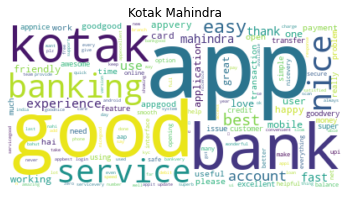

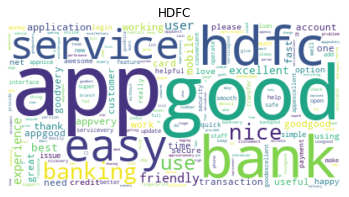

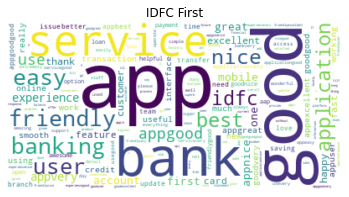

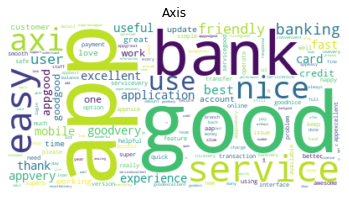

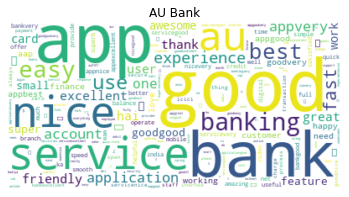

In [65]:
cloud(good_words)

In [66]:
bad=df[df['at']>'2022-05-01'][df['at']>'2022-06-01']
bad_words=tokenword(bad,a='bad')

<ipython-input-66-ac70eae5f5a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bad=df[df['at']>'2022-05-01'][df['at']>'2022-06-01']
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_new.append(pd.DataFrame([j,text,avg]).T)
<ipython-input-62-03bf5184e982>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

         Word  Freq            Bank
40         to  1842  Kotak Mahindra
75          i  1790  Kotak Mahindra
64        not  1699  Kotak Mahindra
63        app  1617  Kotak Mahindra
13         is  1610  Kotak Mahindra
...       ...   ...             ...
4017  namefor     1  Kotak Mahindra
4016      tis     1  Kotak Mahindra
4015     town     1  Kotak Mahindra
4014    fazer     1  Kotak Mahindra
7959  perfect     1  Kotak Mahindra

[7960 rows x 3 columns]
               Word  Freq  Bank
2               app  1613  HDFC
15               to  1586  HDFC
1               the  1504  HDFC
4                is  1155  HDFC
13                i  1153  HDFC
...             ...   ...   ...
2926          acive     1  HDFC
2927  clickpathetic     1  HDFC
2929    interactive     1  HDFC
2930     fastmobile     1  HDFC
5502     timehaving     1  HDFC

[5503 rows x 3 columns]
             Word  Freq        Bank
2              to   810  IDFC First
208           app   781  IDFC First
67              i   651  I

<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_temp=df_new_temp.append(l)
<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_temp=df_new_temp.append(l)
<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_temp=df_new_temp.append(l)
<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_temp=df_new_temp.append(l)
<ipython-input-62-03bf5184e982>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_te

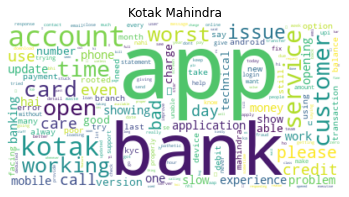

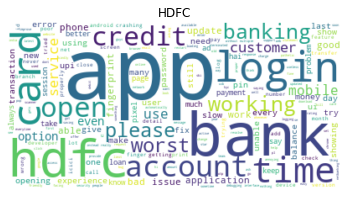

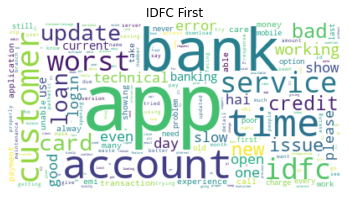

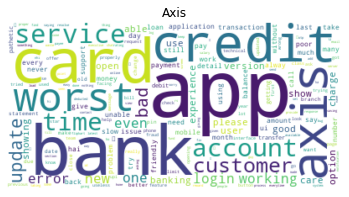

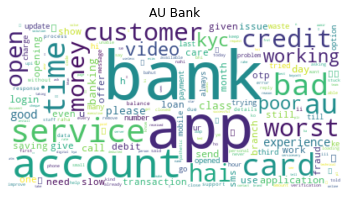

In [69]:
cloud(bad_words)

In [108]:
#bad_words[bad_words['Bank']!='Kotak Mahindra'][bad_words['Word']=='kotak']["Freq"].sum()/bad_words[bad_words['Bank']!='Kotak Mahindra'][bad_words['Word']!='kotak']["Freq"].sum()

In [99]:
good_words[good_words['Bank']!='Kotak Mahindra']['Word'].isin(['kotak'])#.value_counts(normalize=True)

False    0.999834
True     0.000166
Name: Word, dtype: float64

In [102]:
k=good_words['title'].sum()

In [105]:
#[i for i in k]l


In [10]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

df = pd.read_csv('bdwords.csv')#("WordsExcelBad.csv")

#Checking the Data

df.head()

,Unnamed: 0,index,Word,Freq,Bank
0,2,64,not,1699,Kotak Mahindra
1,3,63,app,1617,Kotak Mahindra
2,7,102,bank,1096,Kotak Mahindra
3,13,28,account,752,Kotak Mahindra
4,17,56,kotak,614,Kotak Mahindra


In [11]:
df[df['Word']=='kotak']

,Unnamed: 0,index,Word,Freq,Bank
4,17,56,kotak,614,Kotak Mahindra
8232,8469,142,kotak,14,HDFC
14012,14400,1147,kotak,3,IDFC First
18005,18516,262,kotak,11,Axis


In [12]:
#

In [13]:
df['title']=(df['Word']+' ')*df['Freq']

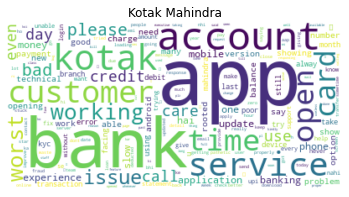

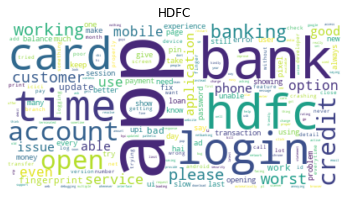

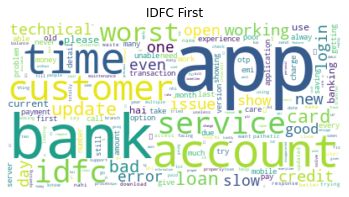

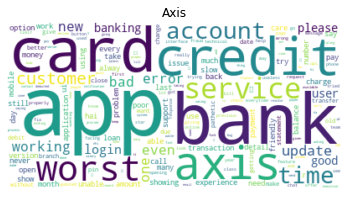

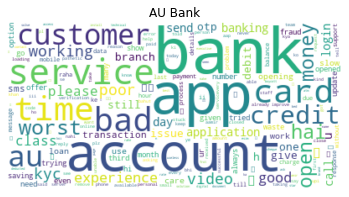

In [14]:
#Creating the text variable
for i in df['Bank'].unique():
    df1=df[df['Bank']==i]
    text2 = " ".join(title for title in df1.title)

    # Creating word_cloud with text as argument in .generate() method

    word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

    # Display the generated Word Cloud

    plt.imshow(word_cloud2, interpolation='bilinear')
    plt.title(str(i))
    plt.axis("off")

    plt.show()

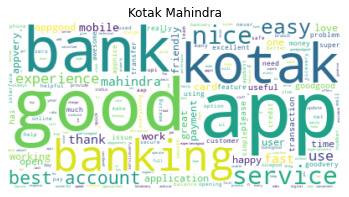

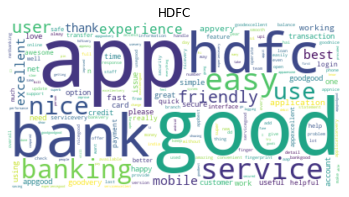

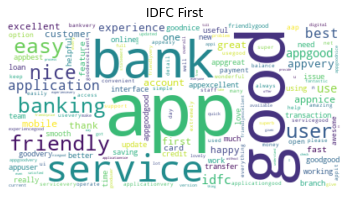

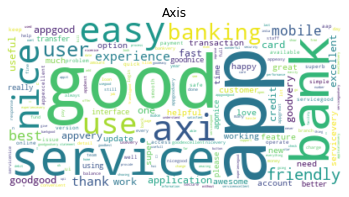

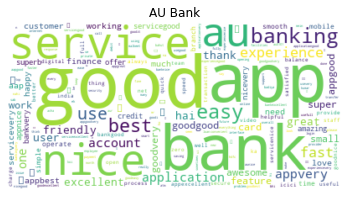

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

df = pd.read_csv('gdwords.csv')#("WordsExcelBad.csv")

#Checking the Data

df.head()

df['title']=(df['Word']+' ')*df['Freq']

#Creating the text variable
for i in df['Bank'].unique():
    df1=df[df['Bank']==i]
    text2 = " ".join(title for title in df1.title)

    # Creating word_cloud with text as argument in .generate() method

    word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

    # Display the generated Word Cloud

    plt.imshow(word_cloud2, interpolation='bilinear')
    plt.title(str(i))
    plt.axis("off")

    plt.show()



In [79]:
df=pd.read_csv('reviews_all.csv')

<ipython-input-79-f6aa4c93c600>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('reviews_all.csv')


In [80]:
df.columns

Index(['Unnamed: 0', 'Review_Number', 'reviewId', 'userName', 'userImage',
       'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'Bank', 'YearQ'],
      dtype='object')

In [88]:
df_temp=df[df['score']<4][df['at']>'2021-01-01']
df_temp['replied']=~df_temp['repliedAt'].isna()

<ipython-input-88-974b66298be8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp=df[df['score']<4][df['at']>'2021-01-01']
<ipython-input-88-974b66298be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['replied']=~df_temp['repliedAt'].isna()


In [123]:
#df_temp.groupby(['Bank','YearQ'], as_index=False)['at'].count()
import numpy as np
df_temp1=df[df['at']>'2021-01-01']
df_temp1['Rate']=np.where(df_temp1['score']<4,'Bad','Good')
df_temp1=pd.concat([df_temp1,pd.get_dummies(df_temp1['Rate'])],axis=1)
df_temp1.groupby(['Bank','YearQ'],as_index=False)['Bad','Good'].sum()


<ipython-input-123-f5b9192a7859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['Rate']=np.where(df_temp1['score']<4,'Bad','Good')
<ipython-input-123-f5b9192a7859>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp1.groupby(['Bank','YearQ'],as_index=False)['Bad','Good'].sum()


,Bank,YearQ,Bad,Good
0,AU Bank,2021Q1,130.0,541.0
1,AU Bank,2021Q2,173.0,621.0
2,AU Bank,2021Q3,351.0,1435.0
3,AU Bank,2021Q4,333.0,1261.0
4,AU Bank,2022Q1,355.0,1117.0
5,AU Bank,2022Q2,477.0,1682.0
6,AU Bank,2022Q3,252.0,1809.0
7,Axis,2021Q1,3274.0,13102.0
8,Axis,2021Q2,5854.0,14469.0
9,Axis,2021Q3,3664.0,12799.0


In [121]:
df_temp1

,Unnamed: 0,Review_Number,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Bank,YearQ,Rate,Bad,Good
0,0.0,0.0,b52c1cde-15c7-405f-ae38-8fe9a97bb437,Vikas Rawat,https://play-lh.googleusercontent.com/a-/AFdZu...,Worst service. They say local charge apply on ...,1.0,0.0,5.3.7,2022-09-02 13:23:12,Hi! We are sorry that you are having issues an...,2022-09-02 13:28:20,Kotak Mahindra,2022Q3,Bad,NaN,NaN
1,1.0,1.0,ab39e197-144f-47f8-81ec-3d1bdf98d6f0,Jigar Nakrani,https://play-lh.googleusercontent.com/a/AItbvm...,Android 6 me bandh kyu kiya,1.0,0.0,5.3.7,2022-09-02 13:20:54,Hi! Sorry for the trouble. It seems to be work...,2022-09-02 13:31:51,Kotak Mahindra,2022Q3,Bad,NaN,NaN
2,2.0,2.0,26a67765-77d2-4efd-a7ef-02c44f51fef4,Rohini Poojary,https://play-lh.googleusercontent.com/a/AItbvm...,Very good,5.0,0.0,5.3.7,2022-09-02 13:17:54,NaN,NaN,Kotak Mahindra,2022Q3,Good,NaN,NaN
3,3.0,3.0,98a5bfaa-fab8-4a27-b848-dfb395c33592,Ashish Vishwakarma,https://play-lh.googleusercontent.com/a-/AFdZu...,can u plz make easy to contact customer care i...,1.0,0.0,5.3.7,2022-09-02 13:08:41,Hi! Sorry to hear that. What is it about our a...,2022-09-02 13:18:57,Kotak Mahindra,2022Q3,Bad,NaN,NaN
4,4.0,4.0,bf2d0b13-8a52-4b65-b861-98771d37c1f2,Deepak Deepu,https://play-lh.googleusercontent.com/a-/AFdZu...,Wery good,5.0,0.0,5.3.3,2022-09-02 13:03:03,Hi! Thank you for giving us a perfect score. I...,2022-09-02 13:15:07,Kotak Mahindra,2022Q3,Good,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1306710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1306711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1306712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [90]:
t=df_temp.groupby(['Bank','YearQ'], as_index=False).replied.value_counts(normalize=True)
t=t[t['replied']==True]
t

,Bank,YearQ,replied,proportion
0,AU Bank,2021Q1,True,0.992308
2,AU Bank,2021Q2,True,0.988439
4,AU Bank,2021Q3,True,0.977208
6,AU Bank,2021Q4,True,0.993994
8,AU Bank,2022Q1,True,1.000000
9,AU Bank,2022Q2,True,0.995807
11,AU Bank,2022Q3,True,0.936508
13,Axis,2021Q1,True,0.742211
16,Axis,2021Q2,True,0.403485
17,Axis,2021Q3,True,0.677402


In [37]:
bank_detail=df[df['at']>'2021-01-01'].groupby(['Bank','YearQ'],as_index=False).aggregate({'score':['count','mean']})

In [38]:
bank_detail.columns=['Bank','YearQ','count','avg']

In [39]:
#bank_detail.groupby('Bank').corr()

In [40]:
bank_detail['YearQ']

0     2021Q1
1     2021Q2
2     2021Q3
3     2021Q4
4     2022Q1
5     2022Q2
6     2022Q3
7     2021Q1
8     2021Q2
9     2021Q3
10    2021Q4
11    2022Q1
12    2022Q2
13    2022Q3
14    2021Q1
15    2021Q2
16    2021Q3
17    2021Q4
18    2022Q1
19    2022Q2
20    2022Q3
21    2021Q1
22    2021Q2
23    2021Q3
24    2021Q4
25    2022Q1
26    2022Q2
27    2022Q3
28    2021Q1
29    2021Q2
30    2021Q3
31    2021Q4
32    2022Q1
33    2022Q2
34    2022Q3
Name: YearQ, dtype: object

In [34]:
import seaborn as sns

In [41]:
#bank_detail=bank_detail[bank_detail['Year']]

In [70]:
bank_detail

,Bank,YearQ,count,avg
0,AU Bank,2021Q1,671,4.233979
1,AU Bank,2021Q2,794,4.139798
2,AU Bank,2021Q3,1786,4.226204
3,AU Bank,2021Q4,1594,4.163112
4,AU Bank,2022Q1,1472,4.044158
5,AU Bank,2022Q2,2159,4.132932
6,AU Bank,2022Q3,2061,4.501698
7,Axis,2021Q1,16376,4.208170
8,Axis,2021Q2,20323,3.867785
9,Axis,2021Q3,16463,4.115046


<AxesSubplot:xlabel='YearQ', ylabel='count'>

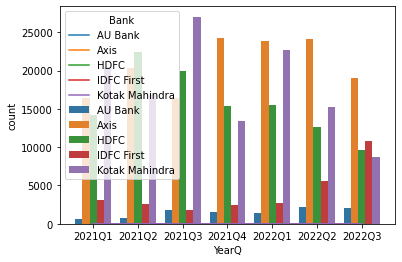

In [44]:
sns.barplot(data=bank_detail, x='YearQ',y='count',hue='Bank')
sns.lineplot(data=bank_detail, x='YearQ',y='avg',hue='Bank')


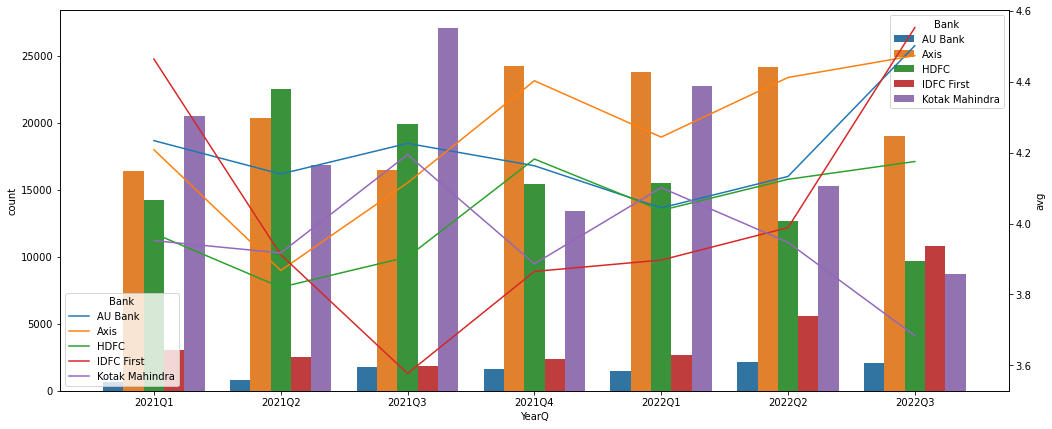

In [52]:
dataset=bank_detail
fig, ax1 = plt.subplots(figsize=(17,7))
ax2=ax1.twinx()
sns.barplot(x='YearQ', y='count', data=dataset, hue='Bank',ax=ax1)
sns.lineplot(x='YearQ',y='avg', data=dataset, hue='Bank', ax=ax2)
plt.show()

In [53]:
l1=[1,2,3]
l2=[4,5,6]
[x*y for x in l1 for y in l2]

[4, 5, 6, 8, 10, 12, 12, 15, 18]

In [78]:
bank_detail.groupby('Bank').corr()['avg']#.query('avg<>1')

Bank                 
AU Bank         count    0.291614
                avg      1.000000
Axis            count    0.359116
                avg      1.000000
HDFC            count   -0.852137
                avg      1.000000
IDFC First      count    0.701691
                avg      1.000000
Kotak Mahindra  count    0.959489
                avg      1.000000
Name: avg, dtype: float64